In [1]:
import tensorflow as tf
import keras
## for imlpementing cnn
import numpy as np
from numpy import array
import pandas as pd
import os #to read files from directory
import cv2 #to read,reshape image
import matplotlib.pyplot as plt #to plot the image
from sklearn.model_selection import train_test_split #spliting data for training and testing
from tensorflow.keras.models import Sequential
## for sequential model for cnn
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPool2D,BatchNormalization
from tensorflow.keras import regularizers

Using TensorFlow backend.


In [2]:
#setting up the directories
train_dir = "C:/Users/USER/Desktop/Satelight images"

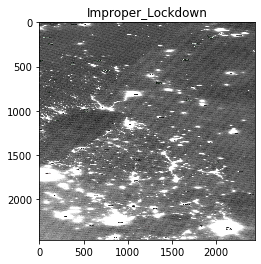

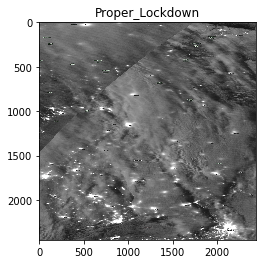

In [3]:
def load_unique():
    size_img = 512,512
    images_for_plot = []
    labels_for_plot = []
    for folder in os.listdir(train_dir):
    ##iterates through the directories
        for file in os.listdir(train_dir + '/' + folder):
            filepath = train_dir + '/' + folder + '/' + file
            ## file path of an indivisual image
            
            image = cv2.imread(filepath)
            final_img = cv2.resize(image, size_img)
            ## resizing the image
            final_img = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
            plt.imshow(image),plt.title(folder)
            plt.show()
            ## plotting and showing the image
            images_for_plot.append(final_img)
            labels_for_plot.append(folder)
            break
    return images_for_plot, labels_for_plot

images_for_plot, labels_for_plot = load_unique()
#print("unique_labels = ", labels_for_plot)

In [4]:
labels_dict = {'Proper_Lockdown':0,'Improper_Lockdown':1}

In [5]:
images = []
labels = []
size = 256,256
for folder in os.listdir(train_dir):
    for image in os.listdir(train_dir + '/' + folder):
        temp_img = cv2.imread(train_dir + '/' + folder + '/' + image)
        temp_img = cv2.resize(temp_img, size)
        images.append(temp_img)
        if folder == 'Proper_Lockdown':
            labels.append(labels_dict['Proper_Lockdown'])
        elif folder == 'Improper_Lockdown':
            labels.append(labels_dict['Improper_Lockdown'])
            
images = np.array(images)
images = images.astype('float32')/255.0

In [6]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.05)

print(len(X_train))
print(len(X_test))

961
51


In [7]:
#one hot encoding
y_train=keras.utils.to_categorical(y_train)
y_test=keras.utils.to_categorical(y_test)

In [13]:
model = Sequential()

model.add(Conv2D(64, kernel_size = 3, padding = 'same', activation = 'relu', input_shape = (256,256,3)))
model.add(Conv2D(32, kernel_size = 3, padding = 'same', strides = 2, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Conv2D(32, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(64, kernel_size = 3, padding = 'same', strides = 2, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Conv2D(128, kernel_size = 3, padding = 'same', activation = 'relu'))
model.add(Conv2D(256, kernel_size = 3, padding = 'same', strides = 2 , activation = 'relu'))
model.add(MaxPool2D(3))

model.add(BatchNormalization())

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ["accuracy"])

In [14]:
model.fit(X_train, y_train, batch_size = 4, epochs = 12, validation_split = 0.1)

Train on 864 samples, validate on 97 samples
Epoch 1/12
864/864 [==============================] - 234s 271ms/step - loss: 2.6719 - acc: 0.8241 - val_loss: 3.7951 - val_acc: 0.7629
Epoch 2/12
864/864 [==============================] - 208s 241ms/step - loss: 2.6548 - acc: 0.8333 - val_loss: 2.1609 - val_acc: 0.8557
Epoch 3/12
864/864 [==============================] - 205s 237ms/step - loss: 2.2555 - acc: 0.8565 - val_loss: 0.3323 - val_acc: 0.9794
Epoch 4/12
864/864 [==============================] - 207s 239ms/step - loss: 3.0609 - acc: 0.8044 - val_loss: 0.3323 - val_acc: 0.9794
Epoch 5/12
864/864 [==============================] - 205s 238ms/step - loss: 2.1337 - acc: 0.8657 - val_loss: 0.1662 - val_acc: 0.9897
Epoch 6/12
864/864 [==============================] - 205s 238ms/step - loss: 2.2389 - acc: 0.8611 - val_loss: 1.3293 - val_acc: 0.9175
Epoch 7/12
864/864 [==============================] - 207s 240ms/step - loss: 2.6451 - acc: 0.8345 - val_loss: 0.3323 - val_acc: 0.9794
Epo

In [15]:
model.evaluate(x=X_test, y=y_test,verbose=0)

[1.5802054650643294, 0.9019607924947551]